# Examine structure of the cytoself manuscript data

In [18]:
# imports

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
os.getcwd()

'/dgx1nas1/storage/data/jess/repos/cytoself/1_explore_original_data/notebooks'

In [31]:
# data paths
img_dir = "/dgx1nas1/storage/data/jess/cytoself/data"
meta_dir = "/dgx1nas1/storage/data/jess/cytoself/labels"
sample_dir = "/dgx1nas1/storage/data/jess/repos/cytoself/sample_data"

In [3]:
meta = pl.read_csv(f"{meta_dir}/label_data00.csv")
dat = np.load(f"{img_dir}/image_data00.npy")

In [8]:
meta

ensg,name,loc_grade1,loc_grade2,loc_grade3,protein_id,FOV_id
str,str,str,str,str,i64,i64
"""ENSG00000075624""","""ACTB""","""membrane;cytoskeleton""","""cytoplasmic""",null,2,27979
"""ENSG00000075624""","""ACTB""","""membrane;cytoskeleton""","""cytoplasmic""",null,2,27979
"""ENSG00000075624""","""ACTB""","""membrane;cytoskeleton""","""cytoplasmic""",null,2,27979
"""ENSG00000075624""","""ACTB""","""membrane;cytoskeleton""","""cytoplasmic""",null,2,27979
"""ENSG00000075624""","""ACTB""","""membrane;cytoskeleton""","""cytoplasmic""",null,2,27979
…,…,…,…,…,…,…
"""ENSG00000134910""","""STT3A""","""er""",null,null,181,19419
"""ENSG00000134910""","""STT3A""","""er""",null,null,181,19419
"""ENSG00000134910""","""STT3A""","""er""",null,null,181,19419


In [10]:
meta.shape

(134304, 7)

In [9]:
dat.shape

(134304, 100, 100, 4)

From the images, I think that the channels are:
- 0 = protein
- 1 = nucleus
- 2 = distance map
- 3 = nuclear segmentation

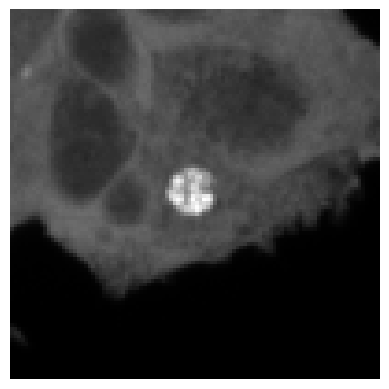

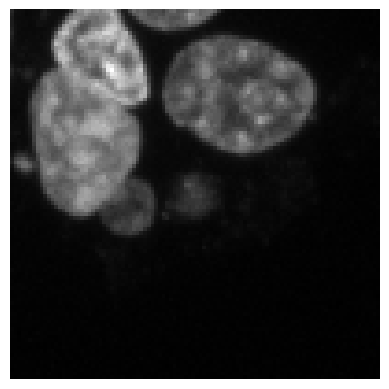

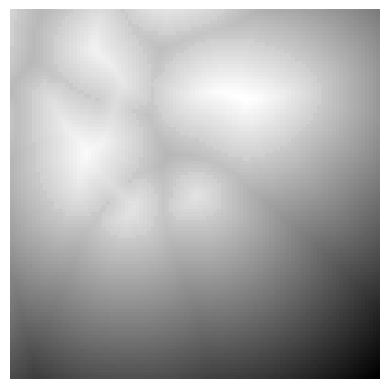

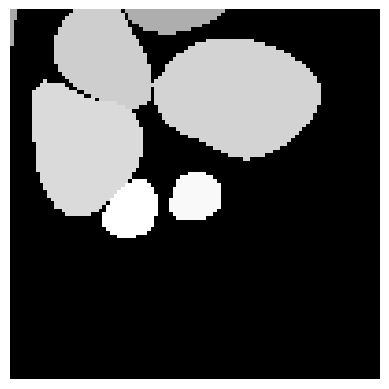

In [17]:
prot_ind = 2000

# Display the image using matplotlib
plt.imshow(dat[prot_ind, :, :, 0], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(dat[prot_ind, :, :, 1], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(dat[prot_ind, :, :, 2], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(dat[prot_ind, :, :, 3], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [35]:
# Compare this to the example data structure
ex_meta = np.load(f"{sample_dir}/ATL3_label.npy", allow_pickle=True)
ex_nuc = np.load(f"{sample_dir}/ATL3_nuc.npy", allow_pickle=True)

# Meta has #cells X 3 columns, each of three imaging npy have #cells X 100x100 pixels
# Need to find out if the pipeline will accept the concatenated data or if I need to split it & format like sample data in order to train the model. 

In [38]:
print(ex_meta.shape)
print(ex_nuc.shape)

(199, 3)
(199, 100, 100)


For cropping my own images, I would:

1. Filter out cells with bad nuclear area: cell area ratios
2. Get nuclear center coordinates for remaining cells. Filter out those within 100 pixels of the image edge
3. Create 100X100 crops of the protein and DNA channels
4. Probably skip distance maps because this means I don't need to do nuclear segmentation, and their ablation analysis showed modest improvement from this step. Need to see how to run model training without distance maps / nuclear segmentation channels.


Plan:
1. Get training running with original manuscript data. Verify that it works. 
2. Crop Varchamp images from batch 7. Perform heavy QA/QC filtering. Perhaps also develop filter to remove fully saturated/barely stained cells. 